# Parte 2 - Redes convolucionales
Esta parte se compone de: 
* Una introducción a las redes neuronales convolucionales
    * Alexnet
    * Capas convolucionales
    * Max pooling
* Realización práctica
    * Preparación de datos y librerías
    * Diseño de la red neuronal
    * Entrenamiento y test
    
    
# Redes Neuronales Convolucionales
Tras el desarrollo del perceptrón en los años 80, las redes neuronales fueron algo marginal durante los años 90 y 2000s, debido en gran parte al desarrollo de nuevos modelos estadísticos para el reconocimiento de imágenes. Éstos eran igualmente potentes, pero se podían ejecutar en los PCs de la época, tardando relativamente poco en su entrenamiento. 

En 2012, Alex Krizhevsky y Geoffrey Hinton ganaron el **Imagenet Challenge**, una competición online de clasificación de imágenes de más de mil categorías. Y lo hicieron con un error que era muy inferior a los demás competidores. **Alexnet**, la propuesta de los investigadores, era la única arquitectura que utilizaba redes neuronales en dicha competición, y utilizaba unos tipos de neuronas sobre los que apenas se había teorizado: las capas convolucionales. En el challenge de 2013 la mitad de los competidores usaban redes neuronales. Dos años después, apenas hubo algún competidor que usara otra estrategia.

Esto fue posible a lo que Nvidia denominó el **Deep Learning Big Bang**, una forma de llamar a la confluencia de tres características impensables décadas antes: una mayor **capacidad de cómputo** con la llegada de las GPU o tarjetas gráficas, que permitían ejecutar el código con un mayor grado de paralelismo junto una **disponibilidad de datos** sin precedentes gracias a internet y el **Big Data**. Esto permitía que las redes neuronales, que habían estado latentes durante décadas, se pudieran aplicar con resultados espectaculares. Hoy día, prácticamente todas las aplicaciones de inteligencia artificial son redes neuronales: desde coches autónomos hasta el traductor de Google; desde el sistema de recomendación de Spotify hasta la detección facial de Instagram. Y todo es gracias a Alexnet. 

## Alexnet
**Alexnet** no fue una propuesta especialmente novedosa. Utilizaba modelos de neuronas y capas que ya se habían teorizado en etapas anteriores. Pero las combinó de forma magistral y consiguió batir a todos sus competidores provenientes del aprendizaje estadístico. La red tiene dos partes bien diferenciadas: una compuesta por redes convolucionales y otra por redes densas. La primera realiza una **extracción automática de características**, mientras que la segunda es la parte propiamente de aprendizaje, o **clasificación**. Esta es la estructura de la red: 

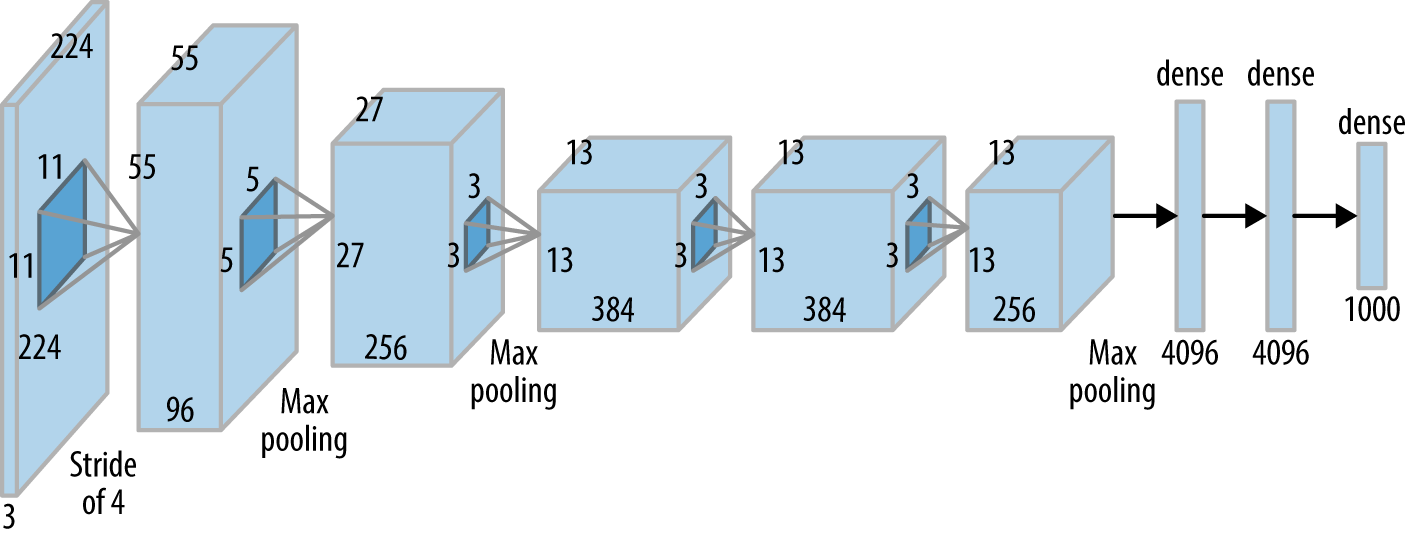

En la figura vemos varias palabras y elementos desconocidos: 
* Hay unos elementos en tres dimensiones (ortoedros) que tienen una anchura, altura y profundidad. Estos representan las **capas convolucionales**. 
* Hay otros elementos que son rectángulos en dos dimensiones: las **capas densas**, *fully connected*, o como las hemos visto en la parte anterior `nn.Linear`.
* Entre cada capa aparece un rectángulo azul de diferente tamaño que conecta unas capas y otras. este es el **reception field**, o campo de recepción de una neurona convolucional.
* Hay una interconexión entre capas convolucionales que se llama **max pooling**. 
* Aparece la palabra **stride**. 

Con excepción de las capas densas, estos elementos son todavía desconocidos. Ahora nos adentraremos en el proceloso mundo de las arquitecturas convolucionales... 

### Capas Convolucionales
*¿Qué son las **capas convolucionales**?, dices mientras clavas en mi pupila tu pupila azul*...

Existe una tradición que considera las capas convolucionales como una arquitectura que realiza la convolución entre una imagen y un filtro. No es que sea errónea. Pero a los del procesado de señal nos hace pensar que realiza operaciones de alto nivel, cuando en realidad no son más que neuronas que hacen lo mismo que las de las capas lineales. Una neurona convolucional realiza la operación: 
$$ y_i^n = f(\mathbf{w^n}*\mathbf{y_{i}^{n-1}}+b_i^n)$$
donde $n$ es el número de capa (la capa de entrada es la 0), $i$ el número de neurona dentro de cada capa y $f()$ es una función de activación. **¿Os suena?** Es casi idéntico a la capa lineal. Solo que esta vez cambian los términos $\mathbf{y_{i}^{n-1}}$ y $\mathbf{w^n}$:
* En el $\mathbf{y_{i}^{n-1}}$ aparece un subíndice $i$ que implica que, de alguna forma, para la neurona $i$ de la capa $n$ solo utilizaremos una parte de las salidas de la capa anterior. Concretamente una porción rectangular que conocemos como el **reception field**, el campo de recepción, también conocido como **tamaño de kernel**. Cada neurona convolucional sólo va a fijarse en ésa parte de la imagen (o de la salida de la capa) anterior. 
* En el $\mathbf{w^n}$, sin embargo, ha desaparecido el subíndice $i$. ¿Qué implica esto? Significa que la matriz de pesos es **compartida** por todas las neuronas de la capa $n$, lo cual ahorra ingentes cantidades de memoria, y a la vez, es lo que hace que esta capa pueda realizar una **convolución**. Esa matriz de pesos también se conoce como **filtros**, y tendrá como tamaño `(F,W,H)`, donde `F` es el "número de filtros", y `W` y `H` el tamaño del filtro, que es el mismo que el tamaño de kernel. 
Visualmente, esta capa hace algo así:
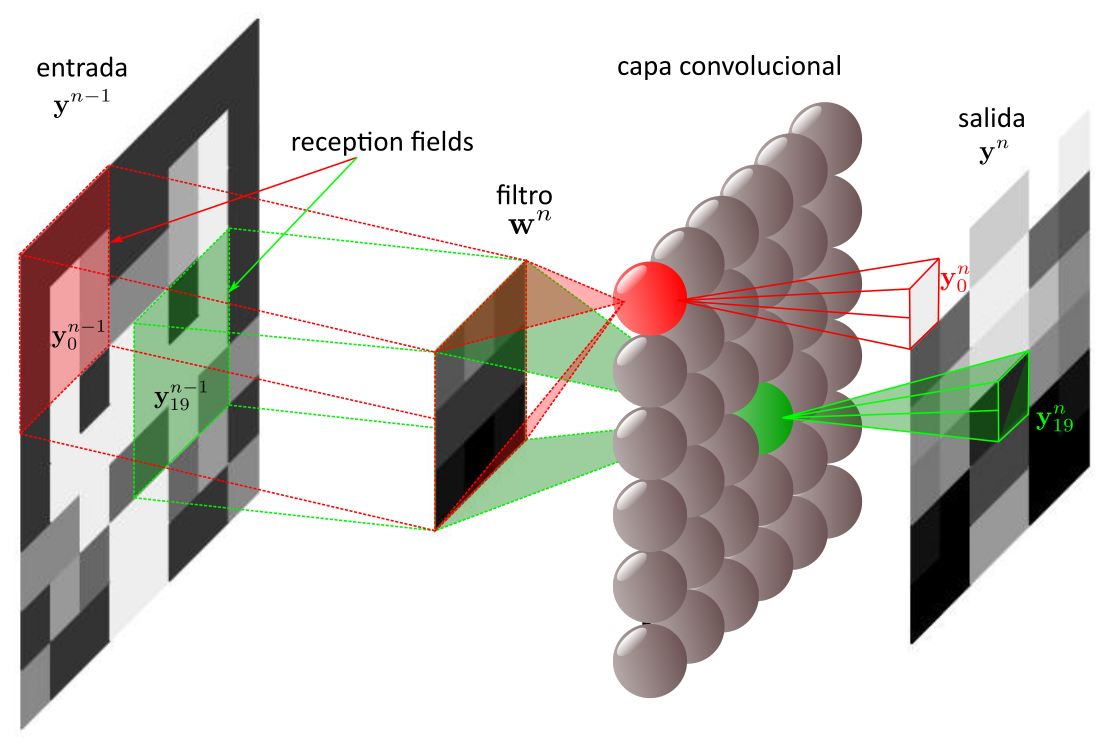

Adicionalmente, las capas convolucionales tienen un parámetro que se llama **stride**, que hemos comentado anteriormente. Este parámetro es la distancia entre los *reception field* de las neuronas: 
* un valor `stride=1`, indica que el centro de un *reception field* y el siguiente están a distancia 1 unidad. 
* un valor `stride=2`, indica que entre el centro de un *reception field* y el siguiente habrá 2 unidades de distancia
* etc. 

Cuanto mayor es el stride, menor será la superposición entre reception fields, y menor será el tamaño de la salida resultante de esa capa convolucional. 

### Max Pooling
**Max pooling** es una operación para reducir el tamaño de los mapas de salida. Para ello divide el mapa de entrada en reception fields de `(W,H)` con un determinado *stride* entre ellos y calcula el máximo de cada uno. El mapa resultante será el mapa que contiene los máximos de cada reception field. Por ejemplo, para un `stride=2` y `pooling=2`, tenemos un mapa que se ha reducido a la mitad: 
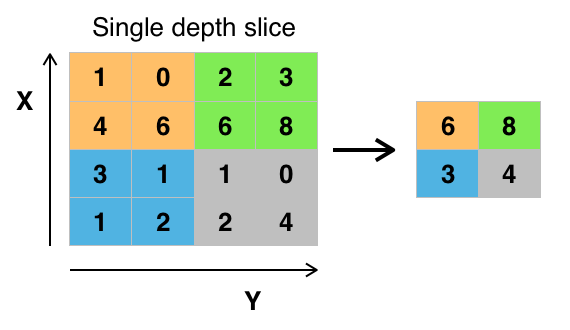

Con estas herramientas podemos ya diseñar nuestra propia **Alexnet** para clasificar números en MNIST. 

# Realización práctica
## Preparación de librerías y datos: 
En primer lugar vamos a importar pytorch, algunos módulos de la librería, y la librería de visualización `matplotlib`, como hicimos en la parte anterior:

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

Vamos a crear el `dataloader` (cargador) de los datos de MNIST. Si hace falta se cargarán de nuevo, utilizando la utilidad `torchvision.datasets` y `torch.utils.Dataloader`. Posteriormente definiremos la función `imshow()` para mostrar un batch de los datos cargados. Todo este código es igual que el de la parte anterior. 

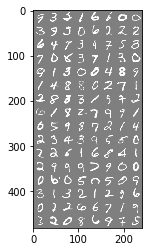

In [37]:
trans = transforms.Compose([transforms.ToTensor()]) #Transformador para el dataset
root = './data/'
# definimos los conjuntos de training y test
train_set = dset.MNIST(root=root, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=root, train=False, transform=trans, download=True)

batch_size = 128 # definimos el batchsize

# y creamos los dataloaders para training y testing
train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)

# Y definimos de nuevo la función de mostrar un batch de los datos
def imshow(img):
    img = img / 2 + 0.5     # desnormalizar
    plt.imshow(img.permute(1, 2, 0)) 
    # cambiamos las dimensiones para que el número de canales 
    # se muestre al final (por defecto en matplotlib)

# convertimos train_loader en un iterador
dataiter = iter(train_loader) 
# y recuperamos el i-esimo elemento, un par de valores (imagenes, etiquetas)
images, labels = dataiter.next() 

# Usamos la función imshow que hemos definido para mostrar imágenes
imshow(make_grid(images))

## Diseño de la red neuronal
Ahora viene el meollo de la cuestión. Vamos a crear nuestra red neuronal como una clase `Alexnet`. A continuación vamos a listar los componentes de esta red neuronal, reduciendo el tamaño de la misma, ya que el tamaño de las imágenes MNIST es 28x28 con 1 canal (escala de grises) mientras que el de Imagenet (la base de datos que usaba el Alexnet original) es de 224x224, y con 3 canales (RGB). Por ejemplo, reduciremos el número de filtros o el stride utilizado, así como el número de neuronas en las capas densas del final. Con esta arquitectura nos quedará: 

* `conv1`: Convolución con `stride=2` y 48 filtros para un reception field de 11x11. 
* Max-pooling de 2 sin `stride`. 
* `conv2`: Convolución sin stride, 128 filtros, reception field de 5x5.
* Max-pooling de 2 sin `stride`. 
* `conv3`: Convolución sin stride, 256 filtros, reception field de 3x3. 
* `conv4`: Convolución sin stride, 256 filtros, reception field de 3x3. 
* `conv5`: Convolución sin stride, 128 filtros, reception field de 3x3. 
* Max-pooling de 2 sin `stride`. 
* Cambio a capas lineales (usar `tensor.view()`). 
* `fc1`: Capa densa (linear) de 1024 neuronas. 
* `fc2`: Capa densa (linear) de 1024 neuronas. 
* `fc3`: Capa densa (linear) de 10 neuronas. 

Todas las capas convolucionales y densas utilizarán activación `ReLU`, salvo la última, que utilizará la función `SoftMax`, como en el perceptrón multicapa. 

Aquí se listan los comandos utilizados para crear las diferentes capas: 
* Capa convolucional de 2 dimensiones: `nn.Conv2d(in_channels, out_channels, kernel_size, stride=1)`. `in_channels` será el número de canales de entrada, `out_channels` el número de canales de salida, que es lo mismo que el número de filtros, `kernel_size` será el tamaño del kernel, o del *reception field*, que si es cuadrado basta con poner un entero igual al tamaño de un lado y `stride` ya lo conocéis. 
* Max-pooling: `nn.MaxPool2d(kernel_size, stride=None)`. 
* Y el resto, son `nn.Linear()`, las funciones `F.relu()` y `F.softmax()`, y el método `.view()` de los tensores de pytorch. 

Si necesitas más detalles, te dejamos aquí una celda que utiliza la ayuda de jupyter. Esto es, escribiendo una función u objeto y añadiendo `?` al final, y ejecutando. También puedes consultar la [ayuda de pytorch](https://pytorch.org/docs/stable/nn.html). 

In [39]:
nn.Conv2d?

Ahora, ya puedes implementar Alexnet:

In [86]:
class Alexnet(nn.Module):
    def __init__(self):
        super(Alexnet, self).__init__() # esta linea es siempre necesaria
        self.conv1 = nn.Conv2d(1, 48, 5, padding=2)
        self.mp1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(48, 128, 3, padding=1)
        self.mp2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.conv5 = nn.Conv2d(256, 128, 3, padding=1)
        self.mp3 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(3*3*128, 256)#capa oculta
        self.fc2 = nn.Linear(256, 256)#capa oculta
        self.fc3 = nn.Linear(256, 10)#capa de salida
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.mp1(x)
        x = F.relu(self.conv2(x))
        x = self.mp2(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = self.mp3(x)
        x = x.view(-1, 3*3*128)
        x = F.relu(self.fc1(x))#Función de activación relu en la salida de la capa oculta
        x = F.relu(self.fc2(x))#Función de activación relu en la salida de la capa oculta
        x = F.softmax(self.fc3(x), dim=1)#Función de activación softmax en la salida de la capa oculta
        return x

Definimos el `model`, el loss y el optimizador, como en el caso anterior. Si queréis podéis probar otras variantes de optimizadores, como `optim.Adam()`. 

In [87]:
model = Alexnet()
criterion = nn.CrossEntropyLoss() # definimos la pérdida
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [69]:
print(model)

Alexnet(
  (conv1): Conv2d(1, 48, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (mp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(48, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (mp2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (mp3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=40, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=10, bias=True)
)


In [88]:
x = model.conv1(images)
x = model.mp1(x)
x = model.conv2(x)
x = model.mp2(x)
x = model.conv3(x)
x = model.conv4(x)
x = model.conv5(x)
x = model.mp3(x)
x = x.view(-1,3*3*128)
x.shape

torch.Size([128, 1152])

In [89]:
outputs

tensor([[0.0982, 0.0943, 0.0987,  ..., 0.1056, 0.1038, 0.1000],
        [0.0982, 0.0943, 0.0986,  ..., 0.1056, 0.1038, 0.1000],
        [0.0982, 0.0943, 0.0987,  ..., 0.1056, 0.1038, 0.1000],
        ...,
        [0.0982, 0.0943, 0.0986,  ..., 0.1055, 0.1038, 0.1001],
        [0.0982, 0.0943, 0.0987,  ..., 0.1055, 0.1038, 0.1002],
        [0.0984, 0.0943, 0.0986,  ..., 0.1054, 0.1039, 0.1003]],
       grad_fn=<SoftmaxBackward>)

In [90]:
n_epochs = 20

for epoch in range(n_epochs):
    print("Train") # Esta será la parte de entrenamiento
    running_loss = 0.0 # el loss en cada epoch de entrenamiento
    running_acc = 0.0 # el accuracy de cada epoch
    total = 0
    for i, (images, labels) in enumerate(train_loader, 0):
        total += labels.shape[0]
        # ponemos a cero todos los gradientes en todas las neuronas
        optimizer.zero_grad()

        # forward + backward + optimizar
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Mostramos las estadísticas
        running_loss += loss.item() # acumulamos el loss de este batch
        # extraemos las etiquetas que predice (nº neurona con máxima probabilidad)
        _, predicted = torch.max(outputs, 1) 
        running_acc += torch.sum(predicted==labels) # y acumulamos el número de correctos
    print(f'>>> Epoch {epoch} >>>> Loss: {running_loss/total}, Acc: {running_acc/total}')

Train
>>> Epoch 0 >>>> Loss: 0.017998200364907582, Acc: 0.09736666828393936
Train
>>> Epoch 1 >>>> Loss: 0.017996646471818287, Acc: 0.11100000143051147
Train


KeyboardInterrupt: 

In [33]:
criterion = nn.CrossEntropyLoss()

x = torch.randn((5,10))
y = torch.randint(10, (5,))

criterion(x,y)

tensor(2.5805)